# Filtering

"Smoothing out rough data"

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import scipy

Consider noisy data：

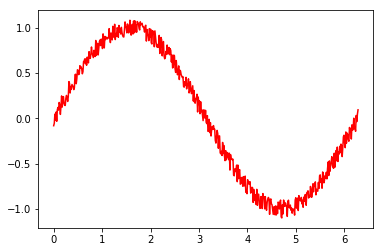

In [2]:
x = np.linspace(0, 2*np.pi, 500)
noise = 0.1 * (np.random.random(x.shape)-0.5)*2
y = np.sin(x) + noise
plt.plot(x,y,'r-')

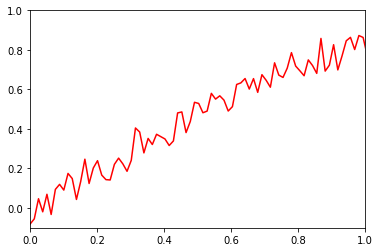

In [3]:
# zoom in

plt.xlim((0,1))
plt.ylim((-0.1,1))
plt.plot(x,y,'r-')

## A 3-point filter example

In [4]:
w = np.array([1, 2, 1]) / 4
w

array([0.25, 0.5 , 0.25])

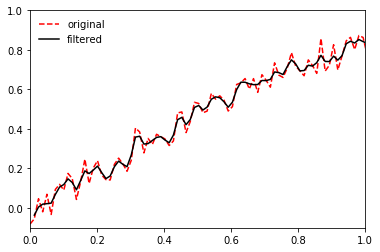

In [5]:
N = y.shape[0]
y1 =  y[:N-2] * w[0]  \
    + y[1:N-1] * w[1] \
    + y[2:] * w[2]

plt.plot(x,y,'r--', label='original')
plt.plot(x[1:N-1], y1, 'k-', label='filtered')
plt.xlim((0,1))
plt.ylim((-0.1,1))
plt.legend(frameon=False)

In [6]:
x.shape, y.shape

((500,), (500,))

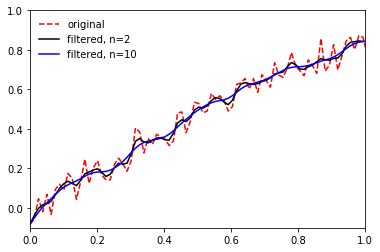

In [7]:
# smoothing "niter" times

def smooth_n(y, niter=10):
    N = y.shape[0]
    y1 = y.copy()
    for i in range(niter):
        y2 =  y1[:N-2] * w[0]  \
            + y1[1:N-1] * w[1] \
            + y1[2:] * w[2]
        y1 = np.concatenate(([y[0]], y2, [y[-1]]))
    return y1

N = y.shape[0]
y1  = smooth_n(y, 2)
y10 = smooth_n(y, 10)
     
plt.figure()
plt.plot(x,y,'r--', label='original')
plt.plot(x, y1, 'k-', label='filtered, n=2')
plt.plot(x, y10, 'b-', label='filtered, n=10')
plt.xlim((0,1))
plt.ylim((-0.1,1))
plt.legend(frameon=False)

## Savitzky-Golay filter

In [8]:
from scipy.signal import savgol_filter

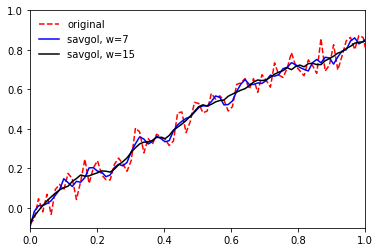

In [9]:
ys5 = savgol_filter(y, 7, 3)
ys15 = savgol_filter(y, 15, 3)
plt.plot(x,y, 'r--', label='original')
plt.plot(x, ys5, 'b-', label='savgol, w=7')
plt.plot(x, ys15, 'k-', label='savgol, w=15')
plt.xlim((0,1))
plt.ylim((-0.1,1))
plt.legend(frameon=False)